<a href="https://colab.research.google.com/github/awarbler/CSE450AWF23/blob/main/M02T01MasterBank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import pickle
import matplotlib.pyplot
campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')


In [ ]:
#look at the file I read in
campaign.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
#What kind of data is in each column?
# look at the columns to see about non null and types
campaign.info()
# no empty columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             37069 non-null  object 
 2   marital         37069 non-null  object 
 3   education       37069 non-null  object 
 4   default         37069 non-null  object 
 5   housing         37069 non-null  object 
 6   loan            37069 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  campaign        37069 non-null  int64  
 11  pdays           37069 non-null  int64  
 12  previous        37069 non-null  int64  
 13  poutcome        37069 non-null  object 
 14  emp.var.rate    37069 non-null  float64
 15  cons.price.idx  37069 non-null  float64
 16  cons.conf.idx   37069 non-null  float64
 17  euribor3m       37069 non-null 

In [ ]:
# Do any of the columns have missing values? No missing values just NaN
campaign.nunique()

age                78
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
campaign           41
pdays              27
previous            8
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         314
nr.employed        11
y                   2
dtype: int64

In [ ]:
campaign.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

array([<Axes: title={'center': 'no'}>, <Axes: title={'center': 'yes'}>],
      dtype=object)

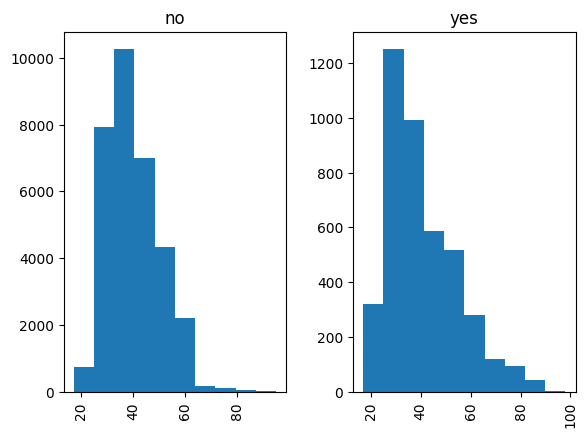

In [ ]:
# @title
campaign.hist('age','y',)
# looks like from 25 - 40 said yes and said no

array([<Axes: title={'center': 'no'}>, <Axes: title={'center': 'yes'}>],
      dtype=object)

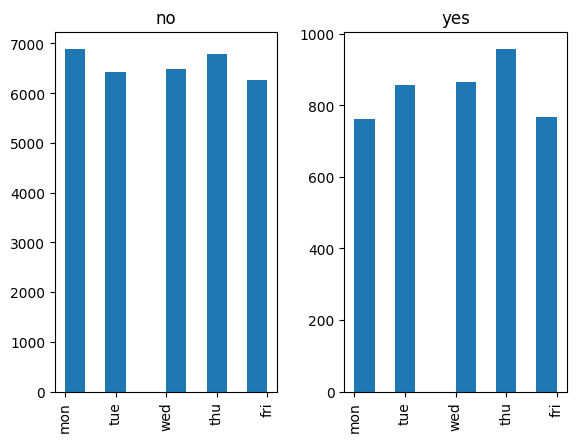

In [ ]:
campaign.hist('day_of_week','y')

Accuracy: 0.8792824386296196
Precision: 0.6996786634024563
Recall: 0.6222213807927234
F1 Score: 0.6468052587587562


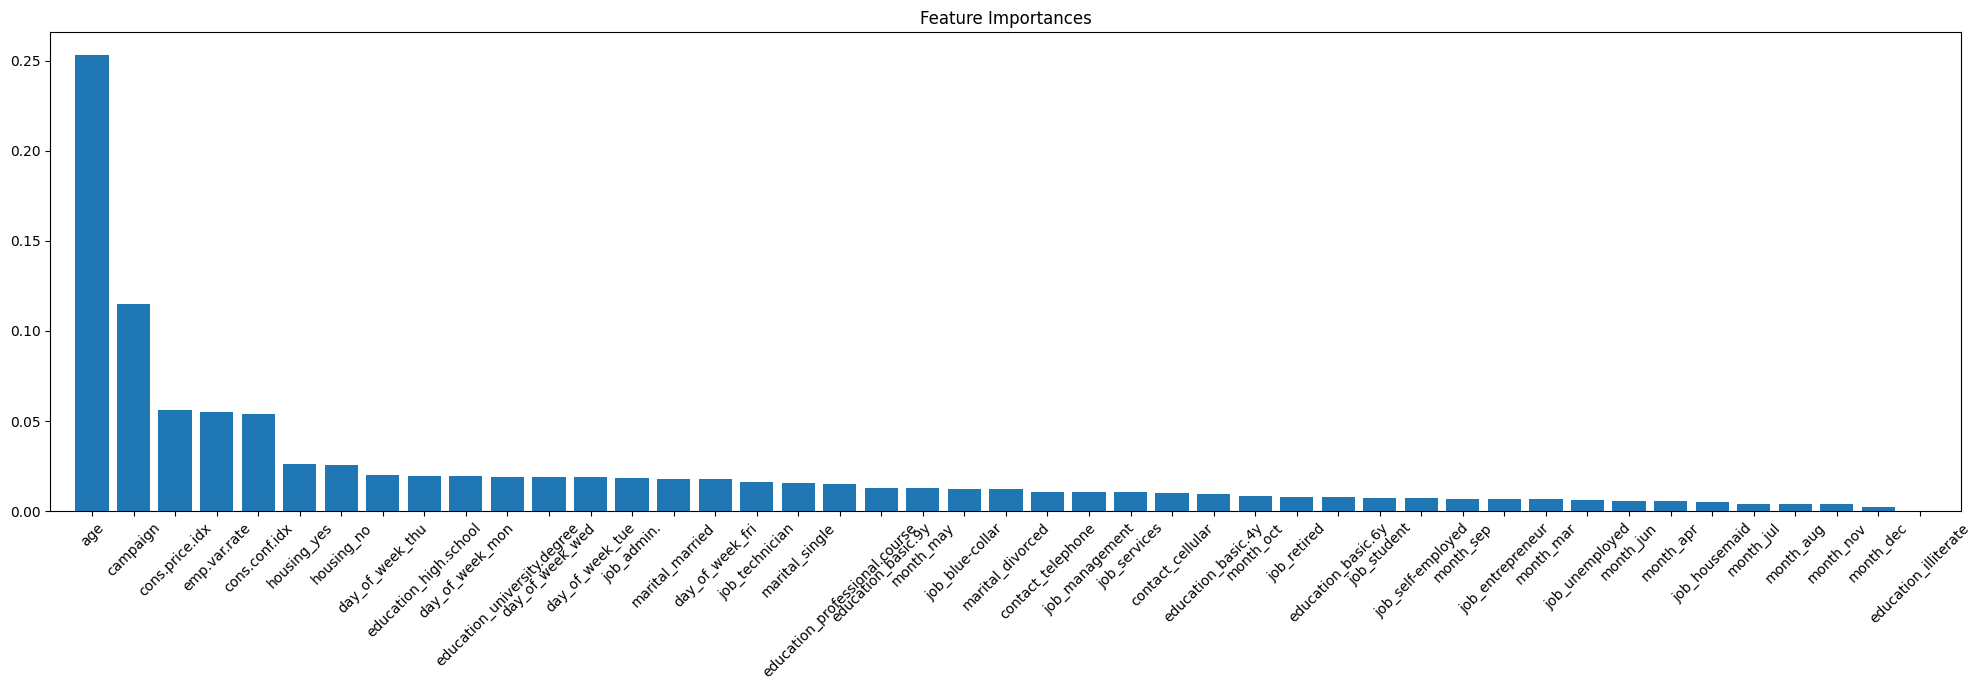

[[6267  261]
 [ 634  252]]


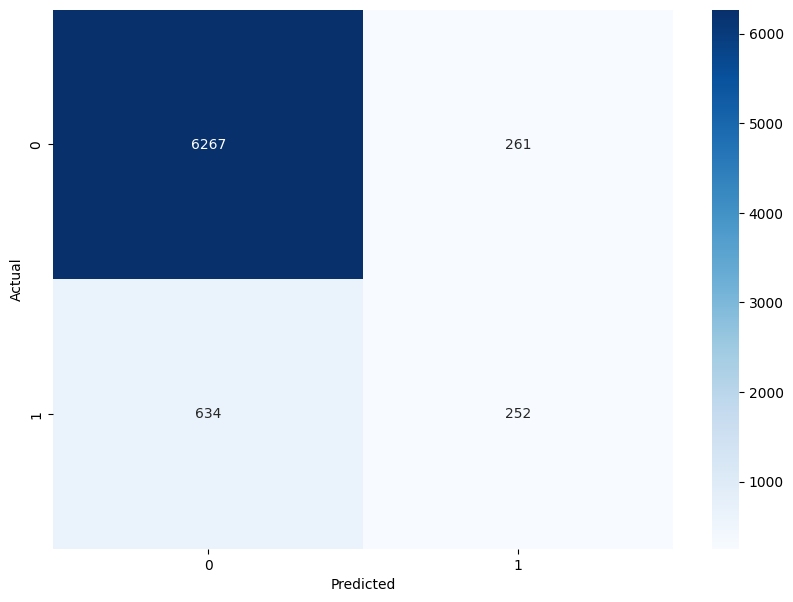

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
# Transform catigorial data into numerical data
campaign_numerical = pd.get_dummies(campaign, columns=['day_of_week', 'month', 'contact', 'housing', 'education', 'marital', 'job'])
# Transform the target column into numerical data
mapping = {'yes': 1, 'no': 0}
campaign_numerical['y'] = campaign_numerical['y'].map(mapping)
# Split data into features and target
features, target = campaign_numerical.drop(['default', 'pdays', 'loan', 'previous', 'euribor3m', 'nr.employed', 'housing_unknown', 'education_unknown', 'marital_unknown', 'job_unknown', 'y', 'poutcome'], axis=1), campaign_numerical['y']
# Split training data and testing data
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)
# Train the model
model = RandomForestClassifier(random_state=42) # Accuracy: 0.88 | Precision: 0.70 | Recall: 0.62 | F1 Score: 0.65
model.fit(feature_train, target_train)
# Have the model make predictions
model_pred = model.predict(feature_test)
#save the model as pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
# Metrics
print("Accuracy:", accuracy_score(target_test, model_pred))
print("Precision:", precision_score(target_test, model_pred, average='macro'))
print("Recall:", recall_score(target_test, model_pred, average='macro'))
print("F1 Score:", f1_score(target_test, model_pred, average='macro'))
# Feature Importance
importances = model.feature_importances_
# Get the list of feature names
feature_names = features.columns.tolist()
# Sort feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]
# Plot feature importances
plt.figure(figsize=(20, 7))
plt.title("Feature Importances")
plt.bar(range(features.shape[1]), importances[indices], align="center")
plt.xticks(range(features.shape[1]), np.array(feature_names)[indices], rotation=45)
plt.xlim([-1, features.shape[1]])
plt.tight_layout()
plt.show()
# Generate the confusion matrix
c_matrix = confusion_matrix(target_test, model_pred)
# displays a text confusion matrix
print(c_matrix)
# If you want to visualize the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(c_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

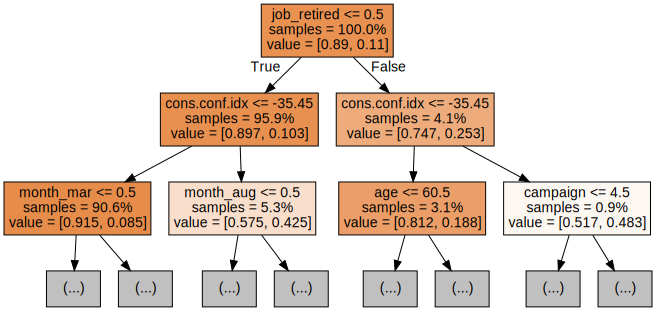

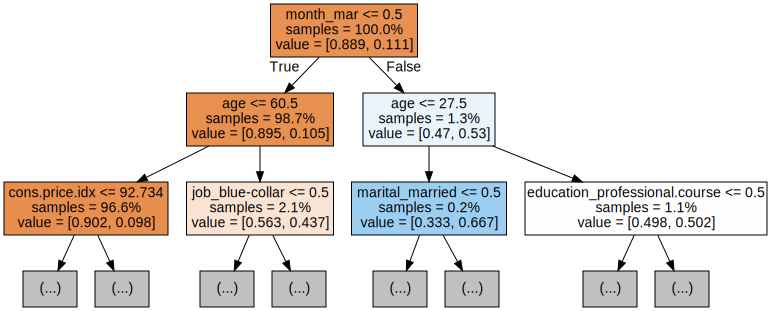

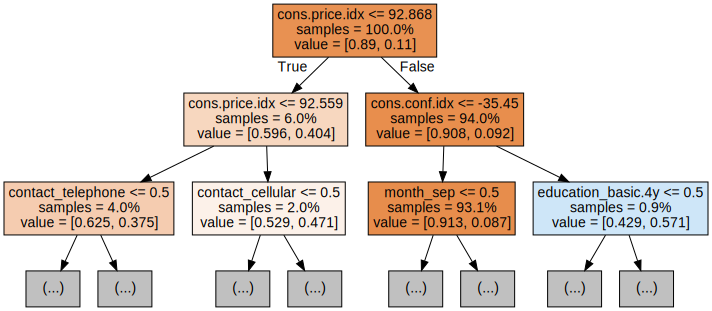

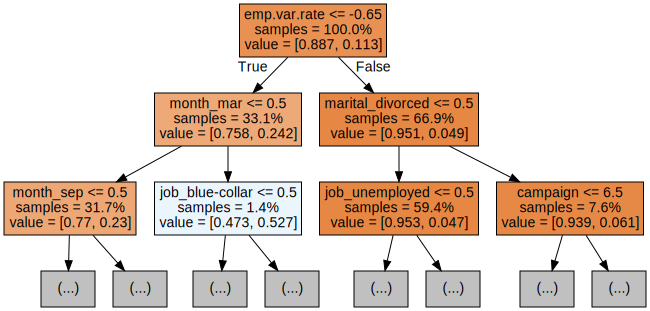

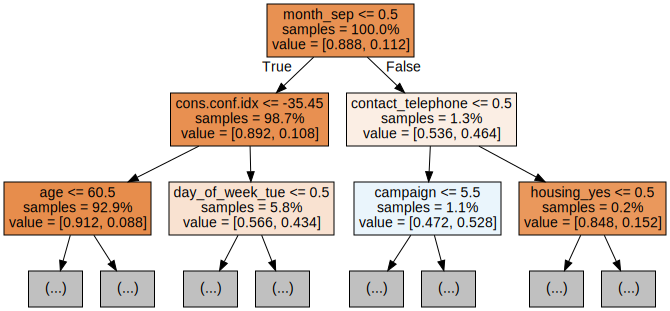

In [ ]:
# Tree Visualisation
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

for i in range(5):
    tree = model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=feature_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
import pickle
# loads from a string
s = pickle.dumps(model)
clf2 = pickle.loads(s)

In [ ]:

# assesing model's performance with the mini holdout set
mini = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test_mini.csv')
column_order = features.columns.tolist()
mini = pd.DataFrame(mini)

mini_encoded = pd.get_dummies(mini, columns=['day_of_week', 'month', 'contact', 'housing', 'education', 'marital', 'job'])
mini_encoded = mini_encoded.drop(['default', 'pdays', 'loan', 'previous', 'euribor3m', 'nr.employed', 'housing_unknown', 'education_unknown', 'marital_unknown', 'job_unknown', 'poutcome'], axis=1)
mini_encoded = mini_encoded[column_order]
mapping = {'yes': 1, 'no': 0}
#mini_encoded.info()
#features.info()


In [ ]:
# formatting mini holdout to match the format of the dataframe our model was trained on
# creating a copy of our campaign dataframe, encoding categorical features
model_pred_holdout = model.predict(mini_encoded)
model_pred_holdout = pd.DataFrame(model_pred_holdout)
# no y feature column to let us know if the predictions are correct or not in the holdout set
#mini_holdout_ground_truth = mini[?]
model_pred_holdout.rename(columns={0:'predictions' }, inplace=True)
model_pred_holdout.to_csv('model_pred_holdout.csv', index=False)
model_pred_holdout

#print("Accuracy:", accuracy_score(model_pred_holdout))
#print(f"Mini Holdout Accuracy: {accuracy:.2f}")

,predictions
0,0
1,0
2,1
3,0
4,0
...,...
405,0
406,0
407,0
408,0


In [ ]:
#from pathlib import Path
#filepath = Path('out.csv')
#filepath.parent.mkdir(exist_ok=True)

#predict = clf2.predict(mini_encoded)
#df = pd.DataFrame(predict, columns=["predictions"])

#df.to_csv(filepath, index=False)

In [ ]:
with open('/content/model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predictions = loaded_model.predict(mini_encoded)
df = pd.DataFrame(predictions, columns=["predictions"])

#df.to_csv(filepath, index=False)

# model_pred_holdout = pd.DataFrame(model_pred_holdout)
# no y feature column to let us know if the predictions are correct or not in the holdout set
# mini_holdout_ground_truth = mini[?]
# model_pred_holdout.to_csv('model_pred_holdout.csv', index=False)
# model_pred_holdout

In [ ]:
full_holdout = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test.csv")
column_order = features.columns.tolist()
full_holdout = pd.DataFrame(full_holdout)

full_encoded = pd.get_dummies(mini, columns=['day_of_week', 'month', 'contact', 'housing', 'education', 'marital', 'job'])
full_encoded = full_encoded.drop(['default', 'pdays', 'loan', 'previous', 'euribor3m', 'nr.employed', 'housing_unknown', 'education_unknown', 'marital_unknown', 'job_unknown', 'poutcome'], axis=1)
full_encoded = full_encoded[column_order]
mapping = {'yes': 1, 'no': 0}


In [ ]:
with open('/content/model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
predictions = loaded_model.predict(full_encoded)
predictions = pd.DataFrame(predictions, columns=["predictions"])
predict_full_holdout = predictions.to_csv('predict_full_holdout.csv', index=False)
predict_full_holdout
